# Chapter 4: 連續隨機變數 (Continuous Random Variables)

> **參考資料**：本筆記內容主要參考自 [Introduction to Probability, Second Edition](https://bookdown.org/probability/beta/) by Joseph K. Blitzstein and Jessica Hwang
> 
> 📚 **章節連結**：[Chapter 4 - Continuous Random Variables](https://bookdown.org/probability/beta/continuous-random-variables.html)

---

## 📖 本章概述

在前面的章節中，我們學習了離散隨機變數（如二項分佈、泊松分佈）。現在我們要進入**連續隨機變數**的世界。

### 🎯 學習目標

1. 理解離散與連續隨機變數的差異
2. 掌握 PDF（機率密度函數）與 CDF（累積分佈函數）
3. 學習 LoTUS（無思統計學家定律）
4. 熟悉重要的連續分佈：
   - 均勻分佈 (Uniform Distribution)
   - 常態分佈 (Normal Distribution)
   - 指數分佈 (Exponential Distribution)

### 💡 為什麼要學連續隨機變數？

許多現實世界的測量都是連續的：
- 時間、距離、溫度
- 身高、體重
- 股票價格
- 機器學習中的損失函數

---

## 1. 離散 vs 連續 (Discrete vs. Continuous)

### 📊 核心差異

| 特性 | 離散隨機變數 | 連續隨機變數 |
|------|------------|------------|
| **取值** | 可數的值（整數） | 不可數的值（實數） |
| **機率函數** | PMF (Probability Mass Function) | PDF (Probability Density Function) |
| **單點機率** | $P(X = x) > 0$ | $P(X = x) = 0$ |
| **累積機率** | $F(x) = \sum_{k \leq x} P(X = k)$ | $F(x) = \int_{-\infty}^{x} f(t) dt$ |
| **範例** | 擲骰子、抽獎次數 | 時間、距離、溫度 |

### 🔍 為什麼 $P(X = x) = 0$？

對於連續隨機變數，**任何特定值的機率都是 0**。這是因為：

1. **精確度問題**：連續值可以有無限多位小數（如 8.283434982741...）
2. **面積概念**：在數線上，單點沒有「長度」，因此沒有面積
3. **數學證明**：$P(X = a) = \int_a^a f(x)dx = F(a) - F(a) = 0$

### 📈 PDF vs PMF

**PMF（離散）**：
- 直接給出機率值：$P(X = k)$
- 所有機率和為 1：$\sum_{k} P(X = k) = 1$

**PDF（連續）**：
- 給出**密度值**，不是機率
- 密度可以 > 1（因為不是機率！）
- 整體積分為 1：$\int_{-\infty}^{\infty} f(x)dx = 1$

### 🎯 如何計算連續隨機變數的機率？

使用**區間機率**：

$$P(a \leq X \leq b) = \int_a^b f(x)dx = F(b) - F(a)$$

其中：
- $f(x)$：PDF（機率密度函數）
- $F(x)$：CDF（累積分佈函數）

### 📚 有效的 PDF 必須滿足：

1. ✅ $f(x) \geq 0$ for all $x$（非負性）
2. ✅ $\int_{-\infty}^{\infty} f(x)dx = 1$（歸一化）

📊 DISCRETE vs CONTINUOUS DEMONSTRATION


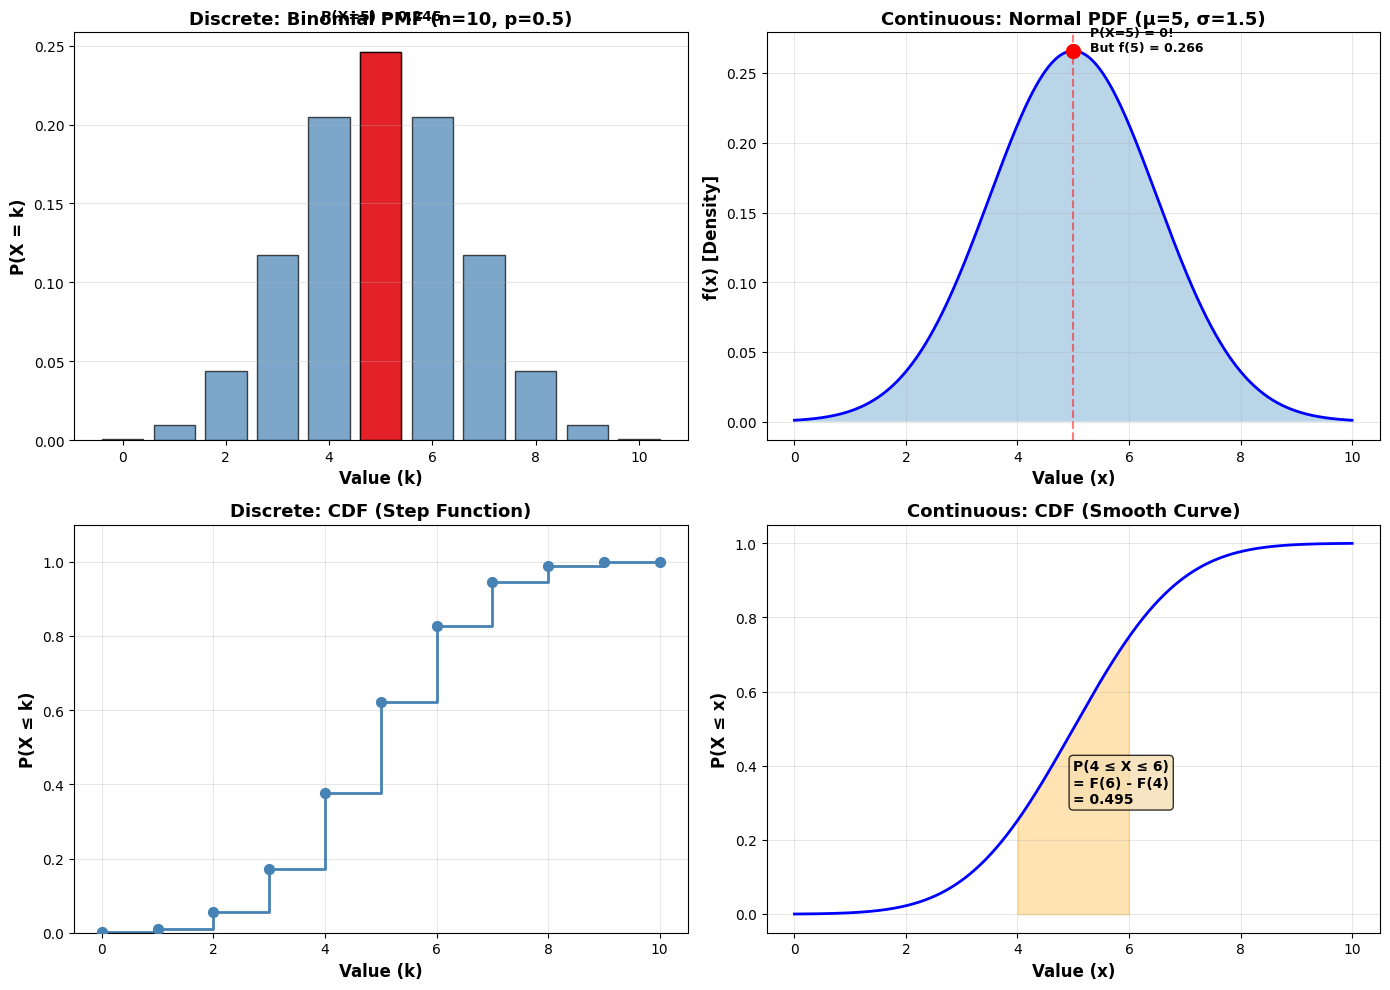


✅ Key Takeaways:
   1️⃣ Discrete: PMF gives exact probabilities at specific points
   2️⃣ Continuous: PDF gives density (not probability!)
   3️⃣ Discrete: P(X = k) > 0 for valid k
   4️⃣ Continuous: P(X = x) = 0 for any specific x
   5️⃣ Discrete CDF: Step function (jumps)
   6️⃣ Continuous CDF: Smooth curve


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("=" * 70)
print("📊 DISCRETE vs CONTINUOUS DEMONSTRATION")
print("=" * 70)

# Create comparison figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Discrete: Binomial Distribution
ax1 = axes[0, 0]
n, p = 10, 0.5
x_discrete = np.arange(0, n+1)
pmf_values = stats.binom.pmf(x_discrete, n, p)

ax1.bar(x_discrete, pmf_values, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Value (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('P(X = k)', fontsize=12, fontweight='bold')
ax1.set_title('Discrete: Binomial PMF (n=10, p=0.5)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Highlight specific value
k_highlight = 5
ax1.bar(k_highlight, pmf_values[k_highlight], color='red', alpha=0.8, edgecolor='black')
ax1.text(k_highlight, pmf_values[k_highlight] + 0.02, 
         f'P(X=5) = {pmf_values[k_highlight]:.3f}', 
         ha='center', fontsize=10, fontweight='bold')

# 2. Continuous: Normal Distribution
ax2 = axes[0, 1]
mu, sigma = 5, 1.5
x_continuous = np.linspace(0, 10, 1000)
pdf_values = stats.norm.pdf(x_continuous, mu, sigma)

ax2.plot(x_continuous, pdf_values, 'b-', linewidth=2)
ax2.fill_between(x_continuous, pdf_values, alpha=0.3)
ax2.set_xlabel('Value (x)', fontsize=12, fontweight='bold')
ax2.set_ylabel('f(x) [Density]', fontsize=12, fontweight='bold')
ax2.set_title('Continuous: Normal PDF (μ=5, σ=1.5)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Highlight specific point (probability = 0!)
x_point = 5
y_point = stats.norm.pdf(x_point, mu, sigma)
ax2.plot(x_point, y_point, 'ro', markersize=10)
ax2.axvline(x=x_point, color='red', linestyle='--', alpha=0.5)
ax2.text(x_point + 0.3, y_point, f'P(X={x_point}) = 0!\nBut f({x_point}) = {y_point:.3f}', 
         fontsize=9, fontweight='bold')

# 3. Discrete CDF
ax3 = axes[1, 0]
cdf_discrete = stats.binom.cdf(x_discrete, n, p)
ax3.step(x_discrete, cdf_discrete, where='post', color='steelblue', linewidth=2)
ax3.scatter(x_discrete, cdf_discrete, color='steelblue', s=50, zorder=5)
ax3.set_xlabel('Value (k)', fontsize=12, fontweight='bold')
ax3.set_ylabel('P(X ≤ k)', fontsize=12, fontweight='bold')
ax3.set_title('Discrete: CDF (Step Function)', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1.1)

# 4. Continuous CDF  
ax4 = axes[1, 1]
cdf_continuous = stats.norm.cdf(x_continuous, mu, sigma)
ax4.plot(x_continuous, cdf_continuous, 'b-', linewidth=2)
ax4.set_xlabel('Value (x)', fontsize=12, fontweight='bold')
ax4.set_ylabel('P(X ≤ x)', fontsize=12, fontweight='bold')
ax4.set_title('Continuous: CDF (Smooth Curve)', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Show interval probability
a, b = 4, 6
mask = (x_continuous >= a) & (x_continuous <= b)
ax4.fill_between(x_continuous[mask], 0, cdf_continuous[mask], alpha=0.3, color='orange')
prob_interval = stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma)
ax4.text(5, 0.3, f'P({a} ≤ X ≤ {b})\n= F({b}) - F({a})\n= {prob_interval:.3f}', 
         fontsize=10, fontweight='bold', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n✅ Key Takeaways:")
print("   1️⃣ Discrete: PMF gives exact probabilities at specific points")
print("   2️⃣ Continuous: PDF gives density (not probability!)")
print("   3️⃣ Discrete: P(X = k) > 0 for valid k")
print("   4️⃣ Continuous: P(X = x) = 0 for any specific x")
print("   5️⃣ Discrete CDF: Step function (jumps)")
print("   6️⃣ Continuous CDF: Smooth curve")
print("=" * 70)

## 2. LoTUS：無思統計學家定律

### 📖 什麼是 LoTUS？

**LoTUS** (Law of The Unconscious Statistician) 是計算期望值的「懶人法」，但神奇的是，它是正確的！

### 🎯 核心公式

**離散情況**：

$$E(g(X)) = \sum_x g(x) \cdot P(X = x)$$

**連續情況**：

$$E(g(X)) = \int_{-\infty}^{\infty} g(x) \cdot f(x) dx$$

### 💡 為什麼叫「無思」？

因為這個方法看起來太簡單了！不需要先找出 $g(X)$ 的分佈，直接把函數 $g(x)$ 代入期望值計算即可。

### 🔑 常見應用

#### 1. 計算 $E(X)$（期望值）

$$E(X) = \int_{-\infty}^{\infty} x \cdot f(x) dx$$

這就是 LoTUS 的特殊情況，其中 $g(x) = x$。

#### 2. 計算 $E(X^2)$（平方期望）

$$E(X^2) = \int_{-\infty}^{\infty} x^2 \cdot f(x) dx$$

這裡 $g(x) = x^2$。

#### 3. 計算變異數

使用 LoTUS 可以輕鬆計算變異數：

$$\begin{align}
\text{Var}(X) &= E[(X - E(X))^2] \\
&= E(X^2) - [E(X)]^2
\end{align}$$

我們可以用 LoTUS 分別計算 $E(X^2)$ 和 $E(X)$！

### 📊 證明變異數公式

$$\begin{align}
\text{Var}(X) &= E[(X - E(X))^2] \\
&= E[X^2 + E(X)^2 - 2X \cdot E(X)] \\
&= E(X^2) + E(E(X)^2) - 2E(X) \cdot E(X) \\
&= E(X^2) + E(X)^2 - 2E(X)^2 \\
&= E(X^2) - E(X)^2
\end{align}$$

### 🎯 實際意義

**不使用 LoTUS**：
1. 找出 $Y = g(X)$ 的分佈
2. 計算 $E(Y)$

**使用 LoTUS**：
1. 直接計算 $E(g(X)) = \int g(x) f(x) dx$

節省大量時間！✨

In [2]:
from scipy.integrate import quad

print("=" * 70)
print("🧮 LoTUS DEMONSTRATION")
print("=" * 70)

# Example: X ~ Uniform(0, 1)
# Let's compute E(X), E(X^2), and Var(X) using LoTUS

def uniform_pdf(x):
    """PDF of Uniform(0, 1)"""
    if 0 <= x <= 1:
        return 1.0
    return 0.0

# Using LoTUS to find E(X)
def integrand_ex(x):
    return x * uniform_pdf(x)

ex, _ = quad(integrand_ex, 0, 1)
print(f"\n📌 Example: X ~ Uniform(0, 1)")
print(f"E(X) = ∫ x · f(x) dx = {ex:.4f}")
print(f"Theoretical: (0 + 1)/2 = 0.5 ✓")

# Using LoTUS to find E(X^2)
def integrand_ex2(x):
    return (x**2) * uniform_pdf(x)

ex2, _ = quad(integrand_ex2, 0, 1)
print(f"\nE(X²) = ∫ x² · f(x) dx = {ex2:.4f}")
print(f"Theoretical: 1/3 ≈ 0.3333 ✓")

# Calculate Variance
var_x = ex2 - ex**2
print(f"\nVar(X) = E(X²) - [E(X)]² = {ex2:.4f} - {ex**2:.4f} = {var_x:.4f}")
print(f"Theoretical: (1-0)²/12 ≈ 0.0833 ✓")

print("\n" + "=" * 70)
print("🎲 Another Example: X ~ Exponential(λ=1)")
print("=" * 70)

# For Exponential(1): f(x) = e^(-x) for x > 0
def exp_pdf(x, lam=1):
    if x > 0:
        return lam * np.exp(-lam * x)
    return 0.0

# E(X) using LoTUS
def integrand_exp_x(x):
    return x * exp_pdf(x, 1)

ex_exp, _ = quad(integrand_exp_x, 0, np.inf)
print(f"\nE(X) = ∫ x · λe^(-λx) dx = {ex_exp:.4f}")
print(f"Theoretical: 1/λ = 1/1 = 1.0 ✓")

# E(X^2) using LoTUS
def integrand_exp_x2(x):
    return (x**2) * exp_pdf(x, 1)

ex2_exp, _ = quad(integrand_exp_x2, 0, np.inf)
print(f"\nE(X²) = ∫ x² · λe^(-λx) dx = {ex2_exp:.4f}")
print(f"Theoretical: 2/λ² = 2/1 = 2.0 ✓")

# Variance
var_exp = ex2_exp - ex_exp**2
print(f"\nVar(X) = E(X²) - [E(X)]² = {ex2_exp:.4f} - {ex_exp**2:.4f} = {var_exp:.4f}")
print(f"Theoretical: 1/λ² = 1/1 = 1.0 ✓")

print("\n" + "=" * 70)
print("💡 LoTUS Power: Computing E(g(X)) for any function g!")
print("=" * 70)

# Let's compute E(sqrt(X)) for X ~ Uniform(0, 1)
def integrand_sqrt(x):
    return np.sqrt(x) * uniform_pdf(x)

e_sqrt_x, _ = quad(integrand_sqrt, 0, 1)
print(f"\nFor X ~ Uniform(0, 1):")
print(f"E(√X) = ∫ √x · f(x) dx = {e_sqrt_x:.4f}")
print(f"Theoretical: ∫₀¹ √x dx = [2x^(3/2)/3]₀¹ = 2/3 ≈ 0.6667 ✓")

# Compute E(e^X) for X ~ Uniform(0, 1)
def integrand_exp_func(x):
    return np.exp(x) * uniform_pdf(x)

e_exp_x, _ = quad(integrand_exp_func, 0, 1)
print(f"\nE(e^X) = ∫ e^x · f(x) dx = {e_exp_x:.4f}")
print(f"Theoretical: ∫₀¹ e^x dx = [e^x]₀¹ = e - 1 ≈ {np.e - 1:.4f} ✓")

print("\n✅ LoTUS lets us compute E(g(X)) without finding the distribution of g(X)!")
print("=" * 70)

🧮 LoTUS DEMONSTRATION

📌 Example: X ~ Uniform(0, 1)
E(X) = ∫ x · f(x) dx = 0.5000
Theoretical: (0 + 1)/2 = 0.5 ✓

E(X²) = ∫ x² · f(x) dx = 0.3333
Theoretical: 1/3 ≈ 0.3333 ✓

Var(X) = E(X²) - [E(X)]² = 0.3333 - 0.2500 = 0.0833
Theoretical: (1-0)²/12 ≈ 0.0833 ✓

🎲 Another Example: X ~ Exponential(λ=1)

E(X) = ∫ x · λe^(-λx) dx = 1.0000
Theoretical: 1/λ = 1/1 = 1.0 ✓

E(X²) = ∫ x² · λe^(-λx) dx = 2.0000
Theoretical: 2/λ² = 2/1 = 2.0 ✓

Var(X) = E(X²) - [E(X)]² = 2.0000 - 1.0000 = 1.0000
Theoretical: 1/λ² = 1/1 = 1.0 ✓

💡 LoTUS Power: Computing E(g(X)) for any function g!

For X ~ Uniform(0, 1):
E(√X) = ∫ √x · f(x) dx = 0.6667
Theoretical: ∫₀¹ √x dx = [2x^(3/2)/3]₀¹ = 2/3 ≈ 0.6667 ✓

E(e^X) = ∫ e^x · f(x) dx = 1.7183
Theoretical: ∫₀¹ e^x dx = [e^x]₀¹ = e - 1 ≈ 1.7183 ✓

✅ LoTUS lets us compute E(g(X)) without finding the distribution of g(X)!


## 3. 均勻分佈 (Uniform Distribution)

### 📖 定義與故事

**均勻分佈** $X \sim \text{Unif}(a, b)$ 表示隨機變數在區間 $[a, b]$ 上「完全隨機」地取值。

**Story**：在區間 $[a, b]$ 中隨機選擇一個數，每個位置被選中的機率「密度」相同。

### 🔑 關鍵概念：機率正比於長度

- 將區間 $[a, b]$ 分成 $n$ 等份
- 每份被選中的機率 = $1/n$
- **機率 ∝ 長度**

對於標準均勻分佈 $\text{Unif}(0, 1)$：
- 區間長度 = 機率
- $P(0.2 \leq X \leq 0.5) = 0.5 - 0.2 = 0.3$

### 📊 PDF（機率密度函數）

$$f(x) = \begin{cases}
\frac{1}{b-a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}$$

**推導**：
- PDF 必須是常數（均勻性）
- PDF 積分必須等於 1：

$$\int_a^b c \, dx = c(b-a) = 1 \implies c = \frac{1}{b-a}$$

### 📈 CDF（累積分佈函數）

$$F(x) = P(X \leq x) = \begin{cases}
0 & \text{if } x < a \\
\frac{x-a}{b-a} & \text{if } a \leq x \leq b \\
1 & \text{if } x > b
\end{cases}$$

**推導**：

$$F(x) = \int_a^x \frac{1}{b-a} dt = \frac{1}{b-a} \cdot (x-a) = \frac{x-a}{b-a}$$

### 🎯 期望值與變異數

**期望值**：

$$E(X) = \int_a^b x \cdot \frac{1}{b-a} dx = \frac{a+b}{2}$$

區間的中點！直覺上很合理。

**變異數**：

$$\text{Var}(X) = E(X^2) - [E(X)]^2 = \frac{(b-a)^2}{12}$$

**標準差**：

$$\sigma = \sqrt{\text{Var}(X)} = \frac{b-a}{2\sqrt{3}} \approx 0.289(b-a)$$

### 📋 重要性質總結

| 性質 | 公式 |
|------|------|
| **PDF** | $f(x) = \frac{1}{b-a}$ for $x \in [a,b]$ |
| **CDF** | $F(x) = \frac{x-a}{b-a}$ for $x \in [a,b]$ |
| **期望值** | $E(X) = \frac{a+b}{2}$ |
| **變異數** | $\text{Var}(X) = \frac{(b-a)^2}{12}$ |
| **標準差** | $\sigma = \frac{b-a}{2\sqrt{3}}$ |

📊 UNIFORM DISTRIBUTION - COMPREHENSIVE ANALYSIS

📌 Example 1: Standard Uniform(0, 1)
Parameters: a = 0, b = 1
PDF f(x) = 1/(b-a) = 1.0000 for x ∈ [0, 1]
Mean E(X) = (a+b)/2 = 0.5000
Variance Var(X) = (b-a)²/12 = 0.0833

Probabilities:
P(X ≤ 0.3) = F(0.3) = 0.3000
P(0.2 ≤ X ≤ 0.7) = F(0.7) - F(0.2) = 0.5000
P(X > 0.6) = 1 - F(0.6) = 0.4000

📌 Example 2: Uniform(5, 15)
Parameters: a = 5, b = 15
PDF f(x) = 1/(b-a) = 0.1000 for x ∈ [5, 15]
Mean E(X) = (a+b)/2 = 10.0000
Variance Var(X) = (b-a)²/12 = 8.3333
Standard Deviation σ = 2.8868


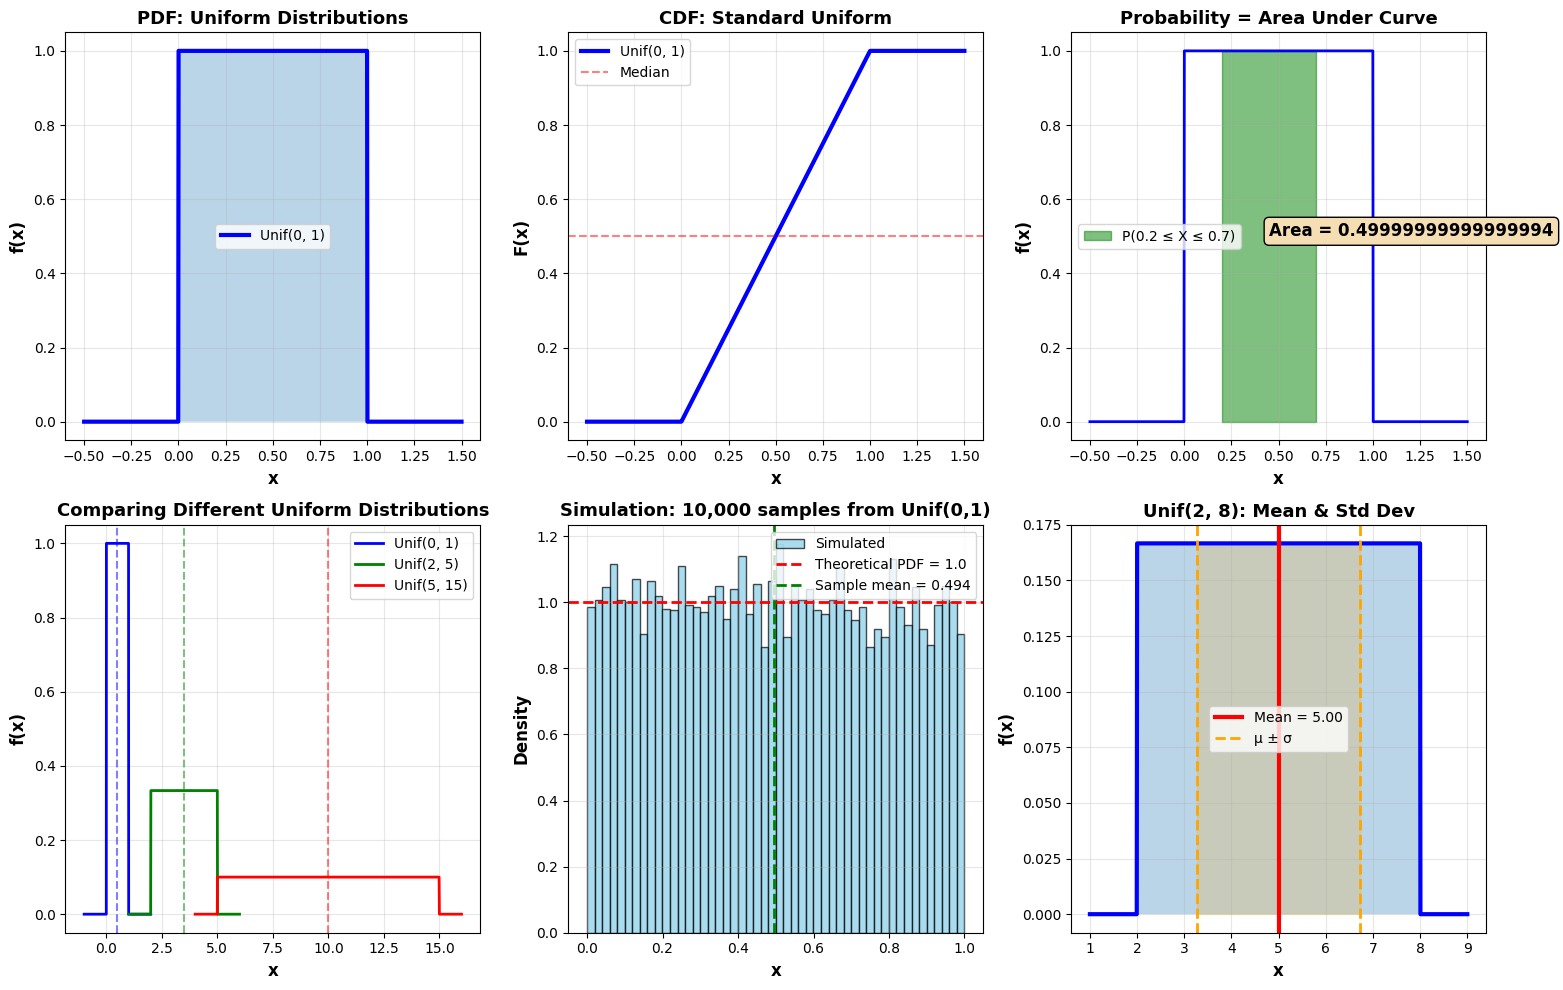


✅ Visualization complete!

💡 Key insights:
   • PDF is constant (flat) across the interval
   • CDF is linear (straight line)
   • Probability = Length of interval
   • Mean is at the center of interval
   • Simulations match theoretical values


In [3]:
print("=" * 70)
print("📊 UNIFORM DISTRIBUTION - COMPREHENSIVE ANALYSIS")
print("=" * 70)

# Define Uniform distribution functions
def uniform_pdf(x, a, b):
    """PDF of Uniform(a, b)"""
    if a <= x <= b:
        return 1 / (b - a)
    return 0

def uniform_cdf(x, a, b):
    """CDF of Uniform(a, b)"""
    if x < a:
        return 0
    elif a <= x <= b:
        return (x - a) / (b - a)
    else:
        return 1

def uniform_mean(a, b):
    """Mean of Uniform(a, b)"""
    return (a + b) / 2

def uniform_var(a, b):
    """Variance of Uniform(a, b)"""
    return (b - a)**2 / 12

# Example 1: Standard Uniform(0, 1)
print("\n📌 Example 1: Standard Uniform(0, 1)")
print("=" * 70)
a1, b1 = 0, 1
print(f"Parameters: a = {a1}, b = {b1}")
print(f"PDF f(x) = 1/(b-a) = {1/(b1-a1):.4f} for x ∈ [{a1}, {b1}]")
print(f"Mean E(X) = (a+b)/2 = {uniform_mean(a1, b1):.4f}")
print(f"Variance Var(X) = (b-a)²/12 = {uniform_var(a1, b1):.4f}")

# Probabilities
print(f"\nProbabilities:")
print(f"P(X ≤ 0.3) = F(0.3) = {uniform_cdf(0.3, a1, b1):.4f}")
print(f"P(0.2 ≤ X ≤ 0.7) = F(0.7) - F(0.2) = {uniform_cdf(0.7, a1, b1) - uniform_cdf(0.2, a1, b1):.4f}")
print(f"P(X > 0.6) = 1 - F(0.6) = {1 - uniform_cdf(0.6, a1, b1):.4f}")

# Example 2: Uniform(5, 15)
print("\n📌 Example 2: Uniform(5, 15)")
print("=" * 70)
a2, b2 = 5, 15
print(f"Parameters: a = {a2}, b = {b2}")
print(f"PDF f(x) = 1/(b-a) = {1/(b2-a2):.4f} for x ∈ [{a2}, {b2}]")
print(f"Mean E(X) = (a+b)/2 = {uniform_mean(a2, b2):.4f}")
print(f"Variance Var(X) = (b-a)²/12 = {uniform_var(a2, b2):.4f}")
print(f"Standard Deviation σ = {np.sqrt(uniform_var(a2, b2)):.4f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. PDF comparison
ax1 = axes[0, 0]
x_range1 = np.linspace(-0.5, 1.5, 1000)
x_range2 = np.linspace(0, 20, 1000)

pdf1 = [uniform_pdf(x, a1, b1) for x in x_range1]
pdf2 = [uniform_pdf(x, a2, b2) for x in x_range2]

ax1.plot(x_range1, pdf1, 'b-', linewidth=3, label='Unif(0, 1)')
ax1.fill_between(x_range1, pdf1, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax1.set_title('PDF: Uniform Distributions', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. CDF comparison
ax2 = axes[0, 1]
cdf1 = [uniform_cdf(x, a1, b1) for x in x_range1]
cdf2 = [uniform_cdf(x, a2, b2) for x in x_range2]

ax2.plot(x_range1, cdf1, 'b-', linewidth=3, label='Unif(0, 1)')
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('F(x)', fontsize=12, fontweight='bold')
ax2.set_title('CDF: Standard Uniform', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Median')
ax2.legend()

# 3. Probability as area
ax3 = axes[0, 2]
x_prob = np.linspace(0.2, 0.7, 100)
pdf_prob = [uniform_pdf(x, a1, b1) for x in x_prob]

x_full = np.linspace(-0.5, 1.5, 1000)
pdf_full = [uniform_pdf(x, a1, b1) for x in x_full]

ax3.plot(x_full, pdf_full, 'b-', linewidth=2)
ax3.fill_between(x_prob, pdf_prob, alpha=0.5, color='green', label='P(0.2 ≤ X ≤ 0.7)')
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax3.set_title('Probability = Area Under Curve', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
prob_value = 0.7 - 0.2
ax3.text(0.45, 0.5, f'Area = {prob_value}', fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle='round', facecolor='wheat'))

# 4. Multiple Uniform distributions
ax4 = axes[1, 0]
uniforms = [(0, 1), (2, 5), (5, 15)]
colors = ['blue', 'green', 'red']

for (a, b), color in zip(uniforms, colors):
    x_range = np.linspace(a-1, b+1, 1000)
    pdf = [uniform_pdf(x, a, b) for x in x_range]
    ax4.plot(x_range, pdf, color=color, linewidth=2, label=f'Unif({a}, {b})')
    mean = uniform_mean(a, b)
    ax4.axvline(x=mean, color=color, linestyle='--', alpha=0.5)

ax4.set_xlabel('x', fontsize=12, fontweight='bold')
ax4.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax4.set_title('Comparing Different Uniform Distributions', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Simulation validation
ax5 = axes[1, 1]
np.random.seed(42)
samples = np.random.uniform(a1, b1, 10000)

ax5.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Simulated')
ax5.axhline(y=1/(b1-a1), color='red', linestyle='--', linewidth=2, label=f'Theoretical PDF = {1/(b1-a1)}')
ax5.axvline(x=np.mean(samples), color='green', linestyle='--', linewidth=2, label=f'Sample mean = {np.mean(samples):.3f}')
ax5.set_xlabel('x', fontsize=12, fontweight='bold')
ax5.set_ylabel('Density', fontsize=12, fontweight='bold')
ax5.set_title('Simulation: 10,000 samples from Unif(0,1)', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Mean and variance visualization
ax6 = axes[1, 2]
a_val, b_val = 2, 8
x_range = np.linspace(a_val-1, b_val+1, 1000)
pdf_vals = [uniform_pdf(x, a_val, b_val) for x in x_range]

mean = uniform_mean(a_val, b_val)
std = np.sqrt(uniform_var(a_val, b_val))

ax6.plot(x_range, pdf_vals, 'b-', linewidth=3)
ax6.fill_between(x_range, pdf_vals, alpha=0.3)
ax6.axvline(x=mean, color='red', linestyle='-', linewidth=3, label=f'Mean = {mean:.2f}')
ax6.axvline(x=mean-std, color='orange', linestyle='--', linewidth=2, label=f'μ ± σ')
ax6.axvline(x=mean+std, color='orange', linestyle='--', linewidth=2)
ax6.fill_betweenx([0, max(pdf_vals)], mean-std, mean+std, alpha=0.2, color='orange')
ax6.set_xlabel('x', fontsize=12, fontweight='bold')
ax6.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax6.set_title(f'Unif({a_val}, {b_val}): Mean & Std Dev', fontsize=13, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")
print("\n💡 Key insights:")
print("   • PDF is constant (flat) across the interval")
print("   • CDF is linear (straight line)")
print("   • Probability = Length of interval")
print("   • Mean is at the center of interval")
print("   • Simulations match theoretical values")
print("=" * 70)

## 4. 常態分佈 (Normal Distribution)

### 📖 為什麼常態分佈如此重要？

**常態分佈**（又稱高斯分佈）是統計學中**最重要**的分佈，原因在於：

1. **中央極限定理 (Central Limit Theorem, CLT)**：大量獨立隨機變數的總和趨向常態分佈
2. **自然界無處不在**：身高、體重、測量誤差等都近似常態分佈
3. **數學性質優美**：易於計算和分析

### 🎯 定義與符號

若 $X \sim N(\mu, \sigma^2)$，表示 $X$ 服從：
- 平均值：$\mu$
- 變異數：$\sigma^2$
- 標準差：$\sigma$

**標準常態分佈**：$Z \sim N(0, 1)$（平均值 0，變異數 1）

### 📊 PDF（機率密度函數）

**標準常態分佈** $Z \sim N(0, 1)$：

$$f(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

**一般常態分佈** $X \sim N(\mu, \sigma^2)$：

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

### 📈 CDF（累積分佈函數）

標準常態的 CDF 通常記為 $\Phi(z)$：

$$\Phi(z) = P(Z \leq z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-t^2/2} dt$$

### 🎯 期望值與變異數

| 性質 | 標準常態 $N(0,1)$ | 一般常態 $N(\mu, \sigma^2)$ |
|------|------------------|----------------------------|
| **期望值** | $E(Z) = 0$ | $E(X) = \mu$ |
| **變異數** | $\text{Var}(Z) = 1$ | $\text{Var}(X) = \sigma^2$ |
| **標準差** | $\sigma_Z = 1$ | $\sigma_X = \sigma$ |

### 🔄 標準化轉換

任何常態分佈都可以轉換成標準常態：

$$\text{If } X \sim N(\mu, \sigma^2), \text{ then } Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$$

反過來：

$$\text{If } Z \sim N(0, 1), \text{ then } X = \mu + \sigma Z \sim N(\mu, \sigma^2)$$

### 📏 68-95-99.7 法則

對於常態分佈：
- **68%** 的數據在 $\mu \pm \sigma$ 範圍內
- **95%** 的數據在 $\mu \pm 2\sigma$ 範圍內
- **99.7%** 的數據在 $\mu \pm 3\sigma$ 範圍內

### 🔑 重要性質

#### 1. 線性組合仍為常態

若 $X \sim N(\mu_X, \sigma_X^2)$ 且 $Y \sim N(\mu_Y, \sigma_Y^2)$ 獨立，則：

$$X + Y \sim N(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$$

#### 2. 對稱性

$$P(Z > a) = P(Z < -a)$$

$$\Phi(-z) = 1 - \Phi(z)$$

---

## 4.1 中央極限定理 (Central Limit Theorem, CLT)

### 🌟 定理陳述

**CLT** 是統計學中最重要的定理之一！

**定理**：設 $X_1, X_2, \ldots, X_n$ 為獨立同分佈 (i.i.d.) 的隨機變數，具有：
- 期望值：$E(X_i) = \mu$
- 變異數：$\text{Var}(X_i) = \sigma^2$

則當 $n \to \infty$ 時：

$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0, 1)$$

其中 $\bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i$（樣本平均）

### 💡 白話解釋

**不管原始分佈是什麼**（可以是均勻、指數、甚至離散分佈），只要：
1. 獨立抽樣
2. 樣本數夠大（通常 $n \geq 30$）

樣本平均的分佈就會接近常態分佈！

### 🎯 實際應用

$$\bar{X} \approx N\left(\mu, \frac{\sigma^2}{n}\right)$$

或者說：

$$\bar{X} \text{ 的標準誤 (Standard Error)} = \frac{\sigma}{\sqrt{n}}$$

### 📊 為什麼 CLT 重要？

1. **民意調查**：從樣本推論母體
2. **品質控制**：產品平均品質
3. **金融風險**：投資組合報酬率
4. **機器學習**：模型評估與信賴區間
5. **A/B Testing**：實驗結果分析

### 🔍 關鍵洞察

- **樣本越大** → 分佈越接近常態
- **變異數越小** → 分佈越集中
- **不需要知道原始分佈**！

In [ ]:
print("=" * 70)
print("📊 NORMAL DISTRIBUTION - COMPREHENSIVE ANALYSIS")
print("=" * 70)

# Standard Normal functions
def standard_normal_pdf(z):
    """PDF of Standard Normal N(0,1)"""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)

def normal_pdf(x, mu, sigma):
    """PDF of Normal N(mu, sigma^2)"""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Example 1: Standard Normal
print("\n📌 Example 1: Standard Normal N(0, 1)")
print("=" * 70)
mu, sigma = 0, 1
print(f"Parameters: μ = {mu}, σ = {sigma}")
print(f"E(Z) = {mu}")
print(f"Var(Z) = {sigma**2}")

# Key probabilities using scipy
print(f"\nKey Probabilities:")
print(f"P(Z ≤ 0) = Φ(0) = {stats.norm.cdf(0, mu, sigma):.4f}")
print(f"P(-1 ≤ Z ≤ 1) = {stats.norm.cdf(1, mu, sigma) - stats.norm.cdf(-1, mu, sigma):.4f} ≈ 0.68 (68% rule)")
print(f"P(-2 ≤ Z ≤ 2) = {stats.norm.cdf(2, mu, sigma) - stats.norm.cdf(-2, mu, sigma):.4f} ≈ 0.95 (95% rule)")
print(f"P(-3 ≤ Z ≤ 3) = {stats.norm.cdf(3, mu, sigma) - stats.norm.cdf(-3, mu, sigma):.4f} ≈ 0.997 (99.7% rule)")

# Example 2: General Normal
print("\n📌 Example 2: General Normal N(100, 15²)")
print("=" * 70)
mu2, sigma2 = 100, 15
print(f"Parameters: μ = {mu2}, σ = {sigma2}")
print(f"E(X) = {mu2}")
print(f"Var(X) = {sigma2**2}")

# Standardization example
x_value = 115
z_score = (x_value - mu2) / sigma2
print(f"\nStandardization Example:")
print(f"X = {x_value} → Z = (X - μ)/σ = ({x_value} - {mu2})/{sigma2} = {z_score:.2f}")
print(f"P(X ≤ {x_value}) = P(Z ≤ {z_score:.2f}) = {stats.norm.cdf(z_score):.4f}")

# Create comprehensive visualizations
fig = plt.figure(figsize=(16, 12))

# 1. Standard Normal PDF
ax1 = plt.subplot(3, 3, 1)
z_range = np.linspace(-4, 4, 1000)
pdf_standard = stats.norm.pdf(z_range, 0, 1)

ax1.plot(z_range, pdf_standard, 'b-', linewidth=2)
ax1.fill_between(z_range, pdf_standard, alpha=0.3)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Mean = 0')
ax1.set_xlabel('z', fontsize=12, fontweight='bold')
ax1.set_ylabel('f(z)', fontsize=12, fontweight='bold')
ax1.set_title('Standard Normal PDF N(0,1)', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 68-95-99.7 Rule
ax2 = plt.subplot(3, 3, 2)
ax2.plot(z_range, pdf_standard, 'b-', linewidth=2)

# Fill areas
mask1 = (z_range >= -1) & (z_range <= 1)
mask2 = (z_range >= -2) & (z_range <= 2)
mask3 = (z_range >= -3) & (z_range <= 3)

ax2.fill_between(z_range[mask3], pdf_standard[mask3], alpha=0.2, color='green', label='99.7% (±3σ)')
ax2.fill_between(z_range[mask2], pdf_standard[mask2], alpha=0.3, color='yellow', label='95% (±2σ)')
ax2.fill_between(z_range[mask1], pdf_standard[mask1], alpha=0.4, color='red', label='68% (±1σ)')

ax2.set_xlabel('z', fontsize=12, fontweight='bold')
ax2.set_ylabel('f(z)', fontsize=12, fontweight='bold')
ax2.set_title('68-95-99.7 Rule', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. CDF
ax3 = plt.subplot(3, 3, 3)
cdf_standard = stats.norm.cdf(z_range, 0, 1)

ax3.plot(z_range, cdf_standard, 'b-', linewidth=2)
ax3.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Φ(0) = 0.5')
ax3.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax3.set_xlabel('z', fontsize=12, fontweight='bold')
ax3.set_ylabel('Φ(z)', fontsize=12, fontweight='bold')
ax3.set_title('Standard Normal CDF', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Different means
ax4 = plt.subplot(3, 3, 4)
means = [0, 2, -2]
colors = ['blue', 'green', 'red']

for mu_val, color in zip(means, colors):
    x_range = np.linspace(-6, 6, 1000)
    pdf_vals = stats.norm.pdf(x_range, mu_val, 1)
    ax4.plot(x_range, pdf_vals, color=color, linewidth=2, label=f'μ={mu_val}, σ=1')

ax4.set_xlabel('x', fontsize=12, fontweight='bold')
ax4.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax4.set_title('Effect of Mean (μ)', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Different standard deviations
ax5 = plt.subplot(3, 3, 5)
sigmas = [0.5, 1, 2]
colors5 = ['red', 'blue', 'green']

for sig, color in zip(sigmas, colors5):
    x_range = np.linspace(-6, 6, 1000)
    pdf_vals = stats.norm.pdf(x_range, 0, sig)
    ax5.plot(x_range, pdf_vals, color=color, linewidth=2, label=f'μ=0, σ={sig}')

ax5.set_xlabel('x', fontsize=12, fontweight='bold')
ax5.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax5.set_title('Effect of Standard Deviation (σ)', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Standardization visualization
ax6 = plt.subplot(3, 3, 6)
mu_orig, sigma_orig = 100, 15
x_orig = np.linspace(50, 150, 1000)
pdf_orig = stats.norm.pdf(x_orig, mu_orig, sigma_orig)

z_std = np.linspace(-3, 3, 1000)
pdf_std = stats.norm.pdf(z_std, 0, 1)

ax6.plot(x_orig, pdf_orig, 'b-', linewidth=2, label=f'X ~ N({mu_orig}, {sigma_orig}²)')
ax6_twin = ax6.twiny()
ax6_twin.plot(z_std, pdf_std, 'r--', linewidth=2, label='Z ~ N(0, 1)')

ax6.set_xlabel(f'X (μ={mu_orig}, σ={sigma_orig})', fontsize=10, fontweight='bold')
ax6_twin.set_xlabel('Z (standardized)', fontsize=10, fontweight='bold', color='red')
ax6.set_ylabel('Density', fontsize=12, fontweight='bold')
ax6.set_title('Standardization: X → Z', fontsize=13, fontweight='bold')
ax6.legend(loc='upper left')
ax6_twin.legend(loc='upper right')
ax6.grid(True, alpha=0.3)

# 7. Sum of Normals
ax7 = plt.subplot(3, 3, 7)
np.random.seed(42)
X = np.random.normal(10, 2, 10000)
Y = np.random.normal(5, 3, 10000)
Z_sum = X + Y

ax7.hist(Z_sum, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='X + Y (simulated)')

# Theoretical
mu_sum = 10 + 5
sigma_sum = np.sqrt(2**2 + 3**2)
x_theory = np.linspace(0, 30, 1000)
pdf_theory = stats.norm.pdf(x_theory, mu_sum, sigma_sum)
ax7.plot(x_theory, pdf_theory, 'r-', linewidth=3, label=f'Theory: N({mu_sum}, {sigma_sum:.1f}²)')

ax7.set_xlabel('x', fontsize=12, fontweight='bold')
ax7.set_ylabel('Density', fontsize=12, fontweight='bold')
ax7.set_title('Sum of Independent Normals', fontsize=13, fontweight='bold')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. CLT Demonstration - Uniform
ax8 = plt.subplot(3, 3, 8)
np.random.seed(42)
sample_sizes = [1, 5, 30]
colors_clt = ['red', 'orange', 'green']

for n, color in zip(sample_sizes, colors_clt):
    sample_means = []
    for _ in range(10000):
        sample = np.random.uniform(0, 1, n)
        sample_means.append(np.mean(sample))
    
    ax8.hist(sample_means, bins=50, density=True, alpha=0.4, color=color, label=f'n={n}')

ax8.set_xlabel('Sample Mean', fontsize=12, fontweight='bold')
ax8.set_ylabel('Density', fontsize=12, fontweight='bold')
ax8.set_title('CLT: Uniform → Normal', fontsize=13, fontweight='bold')
ax8.legend()
ax8.grid(True, alpha=0.3)

# 9. CLT Demonstration - Exponential
ax9 = plt.subplot(3, 3, 9)
np.random.seed(42)

for n, color in zip(sample_sizes, colors_clt):
    sample_means = []
    for _ in range(10000):
        sample = np.random.exponential(1, n)
        sample_means.append(np.mean(sample))
    
    ax9.hist(sample_means, bins=50, density=True, alpha=0.4, color=color, label=f'n={n}')
    
    # Overlay theoretical normal
    if n == 30:
        mu_theory = 1  # Mean of Exp(1)
        sigma_theory = 1 / np.sqrt(n)  # SE of sample mean
        x_theory = np.linspace(0, 2, 1000)
        pdf_theory = stats.norm.pdf(x_theory, mu_theory, sigma_theory)
        ax9.plot(x_theory, pdf_theory, 'b-', linewidth=2, label='Normal approximation')

ax9.set_xlabel('Sample Mean', fontsize=12, fontweight='bold')
ax9.set_ylabel('Density', fontsize=12, fontweight='bold')
ax9.set_title('CLT: Exponential → Normal', fontsize=13, fontweight='bold')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")
print("\n💡 Key insights:")
print("   • Normal distribution: symmetric bell curve")
print("   • 68-95-99.7 rule is extremely useful")
print("   • Standardization converts any normal to N(0,1)")
print("   • Sum of independent normals is also normal")
print("   • CLT: ANY distribution → Normal (with large n)")
print("=" * 70)

## 5. 指數分佈 (Exponential Distribution)

### 📖 定義與故事

**指數分佈** $X \sim \text{Expo}(\lambda)$ 描述「**等待第一次成功所需的時間**」（連續版本）。

**Story**：在連續時間軸上，等待某事件首次發生的時間。

**類比**：
- 幾何分佈 (Geometric)：離散版本（等待幾次試驗）
- 指數分佈 (Exponential)：連續版本（等待多久時間）

### 🎯 參數與意義

**參數 $\lambda$**：速率參數 (rate parameter)
- $\lambda$ 越大 → 事件發生越快 → 等待時間越短
- $\lambda$ 越小 → 事件發生越慢 → 等待時間越長

### 📊 PDF（機率密度函數）

$$f(x) = \begin{cases}
\lambda e^{-\lambda x} & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}$$

**特點**：
- 支撐集 (support)：$x > 0$（時間不能為負）
- 單調遞減（越等越久，密度越小）

### 📈 CDF（累積分佈函數）

$$F(x) = P(X \leq x) = \begin{cases}
1 - e^{-\lambda x} & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}$$

**推導**：

$$F(x) = \int_0^x \lambda e^{-\lambda t} dt = [-e^{-\lambda t}]_0^x = 1 - e^{-\lambda x}$$

### 🎯 期望值與變異數

| 性質 | 公式 | 意義 |
|------|------|------|
| **期望值** | $E(X) = \frac{1}{\lambda}$ | 平均等待時間 |
| **變異數** | $\text{Var}(X) = \frac{1}{\lambda^2}$ | 等待時間的變異 |
| **標準差** | $\sigma = \frac{1}{\lambda}$ | 與期望值相同！ |

**直覺**：
- 若公車每 10 分鐘來一班（$\lambda = 1/10$）
- 平均等待時間 = $1/\lambda = 10$ 分鐘 ✓

### 🔑 無記憶性 (Memoryless Property)

**指數分佈是唯一具有無記憶性的連續分佈！**

$$P(X \geq s + t \mid X \geq s) = P(X \geq t)$$

**白話文**：無論你已經等了多久，未來還要等的時間分佈**不變**。

**證明**：

$$\begin{align}
P(X \geq s + t \mid X \geq s) &= \frac{P(X \geq s + t)}{P(X \geq s)} \\
&= \frac{e^{-\lambda(s+t)}}{e^{-\lambda s}} \\
&= e^{-\lambda t} \\
&= P(X \geq t)
\end{align}$$

### 💡 實際案例

#### 案例 1：等公車
- 如果公車到站時間服從指數分佈
- 你已經等了 30 分鐘
- 未來預期還要等的時間**仍然是原本的期望值**
- 過去的等待「不算數」！

#### 案例 2：機器壽命
- 某些電子元件的壽命服從指數分佈
- 使用 5 年後，預期剩餘壽命與全新時相同
- 沒有「磨損」效應

### 📋 重要性質

#### 1. 縮放性質

若 $X \sim \text{Expo}(\lambda)$，則：

$$\lambda X \sim \text{Expo}(1)$$

#### 2. 最小值性質

若 $X_1 \sim \text{Expo}(\lambda_1)$ 且 $X_2 \sim \text{Expo}(\lambda_2)$ 獨立，則：

$$\min(X_1, X_2) \sim \text{Expo}(\lambda_1 + \lambda_2)$$

**意義**：兩輛公車，哪輛先到的等待時間！

### 🔗 與其他分佈的關係

| 分佈 | 關係 |
|------|------|
| **幾何分佈** | 離散版本 |
| **泊松過程** | 事件間隔時間 |
| **伽瑪分佈** | 指數分佈的推廣 |

In [ ]:
print("=" * 70)
print("⏱️  EXPONENTIAL DISTRIBUTION - COMPREHENSIVE ANALYSIS")
print("=" * 70)

# Define Exponential distribution functions
def exponential_pdf(x, lam):
    """PDF of Exponential(lambda)"""
    if x > 0:
        return lam * np.exp(-lam * x)
    return 0

def exponential_cdf(x, lam):
    """CDF of Exponential(lambda)"""
    if x > 0:
        return 1 - np.exp(-lam * x)
    return 0

def exponential_mean(lam):
    """Mean of Exponential(lambda)"""
    return 1 / lam

def exponential_var(lam):
    """Variance of Exponential(lambda)"""
    return 1 / (lam**2)

# Example 1: Bus waiting time
print("\n📌 Example 1: Bus Waiting Time")
print("=" * 70)
lam1 = 1/10  # Bus arrives every 10 minutes on average
print(f"Scenario: Buses arrive with rate λ = {lam1} per minute")
print(f"         (Average: 1 bus every {1/lam1:.0f} minutes)")
print(f"\nExpected waiting time E(X) = 1/λ = {exponential_mean(lam1):.2f} minutes")
print(f"Variance Var(X) = 1/λ² = {exponential_var(lam1):.2f}")
print(f"Standard deviation σ = {np.sqrt(exponential_var(lam1)):.2f} minutes")

# Probabilities
print(f"\nProbabilities:")
print(f"P(X ≤ 5 min) = {exponential_cdf(5, lam1):.4f} = {exponential_cdf(5, lam1)*100:.2f}%")
print(f"P(X ≤ 10 min) = {exponential_cdf(10, lam1):.4f} = {exponential_cdf(10, lam1)*100:.2f}%")
print(f"P(X > 20 min) = {1 - exponential_cdf(20, lam1):.4f} = {(1-exponential_cdf(20, lam1))*100:.2f}%")

# Example 2: Machine lifetime
print("\n📌 Example 2: Machine Lifetime")
print("=" * 70)
lam2 = 0.1  # Failure rate 0.1 per year
print(f"Scenario: Machine fails with rate λ = {lam2} per year")
print(f"Expected lifetime E(X) = 1/λ = {exponential_mean(lam2):.1f} years")
print(f"P(lifetime > 5 years) = {1 - exponential_cdf(5, lam2):.4f}")
print(f"P(lifetime > 10 years) = {1 - exponential_cdf(10, lam2):.4f}")

# Memoryless property demonstration
print("\n" + "=" * 70)
print("🔮 MEMORYLESS PROPERTY DEMONSTRATION")
print("=" * 70)

# Already waited 5 years, what's P(wait another 3 years)?
s, t = 5, 3
p_wait_more = 1 - exponential_cdf(t, lam2)
p_wait_more_given_survived = (1 - exponential_cdf(s+t, lam2)) / (1 - exponential_cdf(s, lam2))

print(f"\nAlready waited {s} years, P(wait at least {t} more years):")
print(f"Using memoryless property: P(X ≥ {t}) = {p_wait_more:.4f}")
print(f"Direct calculation: P(X ≥ {s+t} | X ≥ {s}) = {p_wait_more_given_survived:.4f}")
print(f"Match! ✓ The past doesn't matter!")

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

# 1. PDF for different lambdas
ax1 = axes[0, 0]
lambdas = [0.5, 1, 2]
colors = ['blue', 'green', 'red']
x_range = np.linspace(0, 8, 1000)

for lam, color in zip(lambdas, colors):
    pdf_vals = [exponential_pdf(x, lam) for x in x_range]
    ax1.plot(x_range, pdf_vals, color=color, linewidth=2, label=f'λ={lam}, E(X)={1/lam:.1f}')

ax1.set_xlabel('x (time)', fontsize=12, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax1.set_title('Exponential PDF: Different Rates', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. CDF for different lambdas
ax2 = axes[0, 1]
for lam, color in zip(lambdas, colors):
    cdf_vals = [exponential_cdf(x, lam) for x in x_range]
    ax2.plot(x_range, cdf_vals, color=color, linewidth=2, label=f'λ={lam}')

ax2.axhline(y=0.632, color='purple', linestyle='--', linewidth=2, alpha=0.5, label='P(X ≤ 1/λ) ≈ 0.632')
ax2.set_xlabel('x (time)', fontsize=12, fontweight='bold')
ax2.set_ylabel('F(x)', fontsize=12, fontweight='bold')
ax2.set_title('Exponential CDF', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Probability as area
ax3 = axes[0, 2]
lam_demo = 1
x_full = np.linspace(0, 5, 1000)
pdf_full = [exponential_pdf(x, lam_demo) for x in x_full]

# Highlight area
x_area = np.linspace(1, 3, 100)
pdf_area = [exponential_pdf(x, lam_demo) for x in x_area]

ax3.plot(x_full, pdf_full, 'b-', linewidth=2)
ax3.fill_between(x_area, pdf_area, alpha=0.5, color='green', label='P(1 ≤ X ≤ 3)')
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax3.set_title(f'Expo({lam_demo}): Probability = Area', fontsize=13, fontweight='bold')
prob_val = exponential_cdf(3, lam_demo) - exponential_cdf(1, lam_demo)
ax3.text(2, 0.3, f'Area = {prob_val:.3f}', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat'))
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Memoryless Property Visualization
ax4 = axes[1, 0]
np.random.seed(42)
lam_mem = 0.5

# Generate samples
samples = np.random.exponential(1/lam_mem, 10000)

# Original distribution
ax4.hist(samples, bins=100, density=True, alpha=0.6, color='blue', 
         edgecolor='black', label='Original Expo(0.5)')

# Conditioned distribution (already waited 2 units)
threshold = 2
conditioned_samples = samples[samples > threshold] - threshold
ax4.hist(conditioned_samples, bins=100, density=True, alpha=0.6, color='red',
         edgecolor='black', label=f'(X - {threshold}) | X > {threshold}')

# Theoretical PDF
x_theory = np.linspace(0, 10, 1000)
pdf_theory = lam_mem * np.exp(-lam_mem * x_theory)
ax4.plot(x_theory, pdf_theory, 'g-', linewidth=3, label='Theoretical PDF')

ax4.set_xlabel('Time', fontsize=12, fontweight='bold')
ax4.set_ylabel('Density', fontsize=12, fontweight='bold')
ax4.set_title('Memoryless Property: Distributions Match!', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Mean and variance
ax5 = axes[1, 1]
lam_viz = 1
x_viz = np.linspace(0, 8, 1000)
pdf_viz = [exponential_pdf(x, lam_viz) for x in x_viz]

mean = exponential_mean(lam_viz)
std = np.sqrt(exponential_var(lam_viz))

ax5.plot(x_viz, pdf_viz, 'b-', linewidth=2)
ax5.fill_between(x_viz, pdf_viz, alpha=0.3)
ax5.axvline(x=mean, color='red', linestyle='-', linewidth=3, label=f'Mean = {mean:.2f}')
ax5.axvline(x=mean+std, color='orange', linestyle='--', linewidth=2, label=f'μ + σ = {mean+std:.2f}')
ax5.set_xlabel('x', fontsize=12, fontweight='bold')
ax5.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax5.set_title(f'Expo({lam_viz}): Mean = Std Dev = {mean:.0f}', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Comparison with Normal
ax6 = axes[1, 2]
lam_comp = 0.5
mean_exp = 1/lam_comp
std_exp = 1/lam_comp

x_exp = np.linspace(0, 10, 1000)
pdf_exp = [exponential_pdf(x, lam_comp) for x in x_exp]

x_norm = np.linspace(-2, 12, 1000)
pdf_norm = stats.norm.pdf(x_norm, mean_exp, std_exp)

ax6.plot(x_exp, pdf_exp, 'b-', linewidth=2, label=f'Exponential (λ={lam_comp})')
ax6.plot(x_norm, pdf_norm, 'r--', linewidth=2, label=f'Normal (μ={mean_exp}, σ={std_exp})')
ax6.set_xlabel('x', fontsize=12, fontweight='bold')
ax6.set_ylabel('Density', fontsize=12, fontweight='bold')
ax6.set_title('Exponential vs Normal (Same Mean & Var)', fontsize=13, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Minimum of Exponentials
ax7 = axes[2, 0]
np.random.seed(42)
lam_1, lam_2 = 1, 2
n_sim = 10000

X1 = np.random.exponential(1/lam_1, n_sim)
X2 = np.random.exponential(1/lam_2, n_sim)
min_samples = np.minimum(X1, X2)

ax7.hist(min_samples, bins=100, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label='min(X₁, X₂) simulated')

# Theoretical: min ~ Expo(lambda_1 + lambda_2)
lam_sum = lam_1 + lam_2
x_theory = np.linspace(0, 3, 1000)
pdf_theory = lam_sum * np.exp(-lam_sum * x_theory)
ax7.plot(x_theory, pdf_theory, 'r-', linewidth=3, label=f'Theory: Expo({lam_sum})')

ax7.set_xlabel('Time to first event', fontsize=12, fontweight='bold')
ax7.set_ylabel('Density', fontsize=12, fontweight='bold')
ax7.set_title(f'min(Expo({lam_1}), Expo({lam_2})) = Expo({lam_sum})', fontsize=13, fontweight='bold')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Simulation validation
ax8 = axes[2, 1]
np.random.seed(42)
lam_sim = 1.5
samples_sim = np.random.exponential(1/lam_sim, 10000)

ax8.hist(samples_sim, bins=100, density=True, alpha=0.7, color='lightgreen',
         edgecolor='black', label='Simulated (10,000 samples)')

x_sim = np.linspace(0, 6, 1000)
pdf_sim = lam_sim * np.exp(-lam_sim * x_sim)
ax8.plot(x_sim, pdf_sim, 'r-', linewidth=3, label=f'Theoretical Expo({lam_sim})')

ax8.axvline(x=np.mean(samples_sim), color='blue', linestyle='--', linewidth=2,
            label=f'Sample mean = {np.mean(samples_sim):.3f}')
ax8.axvline(x=1/lam_sim, color='orange', linestyle='--', linewidth=2,
            label=f'True mean = {1/lam_sim:.3f}')

ax8.set_xlabel('x', fontsize=12, fontweight='bold')
ax8.set_ylabel('Density', fontsize=12, fontweight='bold')
ax8.set_title('Simulation Validation', fontsize=13, fontweight='bold')
ax8.legend(fontsize=9)
ax8.grid(True, alpha=0.3)

# 9. Survival function
ax9 = axes[2, 2]
lam_surv = 0.5
x_surv = np.linspace(0, 10, 1000)
survival = np.exp(-lam_surv * x_surv)  # P(X > x) = e^(-λx)

ax9.plot(x_surv, survival, 'b-', linewidth=3, label='S(x) = P(X > x)')
ax9.fill_between(x_surv, survival, alpha=0.3)
ax9.axhline(y=0.5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Median survival')

# Find median
median = -np.log(0.5) / lam_surv
ax9.axvline(x=median, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax9.text(median+0.3, 0.55, f'Median = {median:.2f}', fontsize=10, fontweight='bold')

ax9.set_xlabel('Time', fontsize=12, fontweight='bold')
ax9.set_ylabel('Survival Probability', fontsize=12, fontweight='bold')
ax9.set_title(f'Survival Function: Expo({lam_surv})', fontsize=13, fontweight='bold')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")
print("\n💡 Key insights:")
print("   • Exponential: waiting time for first event")
print("   • PDF is exponentially decreasing")
print("   • Memoryless: past waiting doesn't affect future")
print("   • Mean = Standard deviation = 1/λ")
print("   • min(Expo(λ₁), Expo(λ₂)) = Expo(λ₁ + λ₂)")
print("   • Survival function: S(x) = e^(-λx)")
print("=" * 70)

## 6. 章節總結 (Chapter Summary)

### 📚 核心概念回顧

#### 1. 連續 vs 離散
- **離散**：PMF, $P(X=x) > 0$, 求和
- **連續**：PDF, $P(X=x) = 0$, 積分
- 機率 = 區間面積

#### 2. LoTUS (無思統計學家定律)
$$E(g(X)) = \int_{-\infty}^{\infty} g(x) f(x) dx$$
- 不需要找 $g(X)$ 的分佈
- 直接計算期望值

#### 3. 三大重要分佈

| 分佈 | 參數 | PDF | 期望值 | 變異數 | 特性 |
|------|------|-----|--------|--------|------|
| **Uniform(a,b)** | $a, b$ | $\frac{1}{b-a}$ | $\frac{a+b}{2}$ | $\frac{(b-a)^2}{12}$ | 機率∝長度 |
| **Normal($\mu$,$\sigma^2$)** | $\mu, \sigma$ | $\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ | $\mu$ | $\sigma^2$ | 鐘型曲線, CLT |
| **Expo($\lambda$)** | $\lambda$ | $\lambda e^{-\lambda x}$ | $\frac{1}{\lambda}$ | $\frac{1}{\lambda^2}$ | 無記憶性 |

### 🎯 關鍵定理

#### 中央極限定理 (CLT)
無論原始分佈如何，樣本平均的分佈趨向常態：
$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0, 1)$$

**意義**：統計推論的基礎！

#### 無記憶性 (Memoryless)
只有**指數分佈**（連續）和**幾何分佈**（離散）具有此性質：
$$P(X \geq s+t \mid X \geq s) = P(X \geq t)$$

### 💡 實用技巧

1. **標準化**：將任何常態轉換成標準常態
   $$Z = \frac{X - \mu}{\sigma}$$

2. **68-95-99.7 法則**：快速估算常態機率

3. **指數分佈的期望值**：$E(X) = 1/\lambda$（速率的倒數）

4. **區間機率**：$P(a \leq X \leq b) = F(b) - F(a)$

### 📊 應用場景

| 分佈 | 典型應用 |
|------|----------|
| **Uniform** | 隨機數生成、蒙特卡羅模擬 |
| **Normal** | 測量誤差、自然現象、統計推論 |
| **Exponential** | 等待時間、可靠性分析、泊松過程 |

---

## 7. 練習題 (Practice Problems)

### 問題 1：均勻分佈

某公車站，公車每 15 分鐘來一班。你隨機到達公車站，等待時間 $X \sim \text{Unif}(0, 15)$。

a) 期望等待時間是多少？  
b) 等待時間少於 5 分鐘的機率？  
c) 等待時間在 5-10 分鐘之間的機率？

<details>
<summary>點擊查看答案</summary>

a) $E(X) = \frac{0+15}{2} = 7.5$ 分鐘

b) $P(X < 5) = \frac{5-0}{15-0} = \frac{5}{15} = 0.333$ (33.3%)

c) $P(5 \leq X \leq 10) = \frac{10-5}{15-0} = \frac{5}{15} = 0.333$ (33.3%)
</details>

---

### 問題 2：常態分佈與標準化

某考試成績 $X \sim N(75, 10^2)$。

a) 成績高於 85 分的機率？  
b) 成績在 65-85 分之間的機率？  
c) 如果要讓 90% 的學生及格，及格分數應設為多少？

<details>
<summary>點擊查看答案</summary>

a) 標準化：$Z = \frac{85-75}{10} = 1$  
   $P(X > 85) = P(Z > 1) = 1 - \Phi(1) \approx 1 - 0.8413 = 0.1587$ (15.87%)

b) $P(65 \leq X \leq 85) = P(-1 \leq Z \leq 1) \approx 0.68$ (68%)

c) 要找 $x$ 使得 $P(X \geq x) = 0.9$，即 $P(X < x) = 0.1$  
   $\Phi^{-1}(0.1) \approx -1.28$  
   $x = 75 + 10(-1.28) = 62.2$ 分
</details>

---

### 問題 3：中央極限定理

從均勻分佈 $\text{Unif}(0, 10)$ 中抽取 100 個樣本，計算樣本平均 $\bar{X}$。

a) $\bar{X}$ 的近似分佈？  
b) $P(\bar{X} > 5.5)$？

<details>
<summary>點擊查看答案</summary>

a) 由 CLT：  
   - $\mu = \frac{0+10}{2} = 5$  
   - $\sigma^2 = \frac{(10-0)^2}{12} = \frac{100}{12} \approx 8.33$  
   - $\bar{X} \approx N\left(5, \frac{8.33}{100}\right) = N(5, 0.0833)$

b) 標準化：$Z = \frac{5.5-5}{\sqrt{0.0833}} = \frac{0.5}{0.289} \approx 1.73$  
   $P(\bar{X} > 5.5) = P(Z > 1.73) \approx 1 - 0.9582 = 0.0418$ (4.18%)
</details>

---

### 問題 4：指數分佈與無記憶性

客服中心接到電話的時間間隔服從 $\text{Expo}(0.2)$（單位：分鐘）。

a) 平均多久會接到一通電話？  
b) 超過 10 分鐘沒接到電話的機率？  
c) 已經等了 5 分鐘，再等 5 分鐘還沒接到電話的機率？

<details>
<summary>點擊查看答案</summary>

a) $E(X) = \frac{1}{\lambda} = \frac{1}{0.2} = 5$ 分鐘

b) $P(X > 10) = e^{-\lambda \cdot 10} = e^{-0.2 \times 10} = e^{-2} \approx 0.1353$ (13.53%)

c) 由無記憶性：$P(X > 10 \mid X > 5) = P(X > 5) = e^{-0.2 \times 5} = e^{-1} \approx 0.3679$ (36.79%)
</details>

---

### 問題 5：最小值性質

兩輛公車分別服從 $\text{Expo}(1/10)$ 和 $\text{Expo}(1/15)$（單位：分鐘）。

a) 第一輛公車到達的期望時間分佈？  
b) 平均等待時間？

<details>
<summary>點擊查看答案</summary>

a) $\min(X_1, X_2) \sim \text{Expo}(\lambda_1 + \lambda_2) = \text{Expo}(1/10 + 1/15) = \text{Expo}(1/6)$

b) $E[\min(X_1, X_2)] = \frac{1}{1/6} = 6$ 分鐘
</details>

---

## 8. 延伸學習資源

### 📖 推薦閱讀

1. **Blitzstein & Hwang** - Introduction to Probability (本章參考來源)
2. **Ross** - A First Course in Probability
3. **DeGroot & Schervish** - Probability and Statistics

### 🎥 視覺化工具

- [Seeing Theory](https://seeing-theory.brown.edu/) - 互動式機率視覺化
- [Distribution Calculator](https://homepage.divms.uiowa.edu/~mbognar/applets/normal.html)

### 💻 Python 工具

```python
# SciPy 統計函數
from scipy import stats

# 均勻分佈
stats.uniform.pdf(x, loc=a, scale=b-a)
stats.uniform.cdf(x, loc=a, scale=b-a)

# 常態分佈
stats.norm.pdf(x, loc=mu, scale=sigma)
stats.norm.cdf(x, loc=mu, scale=sigma)

# 指數分佈
stats.expon.pdf(x, scale=1/lambda)
stats.expon.cdf(x, scale=1/lambda)
```

### 🎯 下一步

學完本章後，建議繼續學習：
- **Chapter 5**: Moment Generating Functions
- **Chapter 6**: Joint Distributions
- **Chapter 7**: Covariance and Correlation

---

**恭喜完成 Chapter 4！** 🎉

你已經掌握了連續隨機變數的核心概念，包括三大重要分佈和中央極限定理。這些是統計推論和機器學習的重要基礎！